# Convolutions

Given $f,h\in \mathbb{R}^{n\times n}$, the (periodic/circular) convolution  is $g = h\star f \in\mathbb{R}^{n\times n}$
$$
g[\mathbf{k}] = \sum_{\mathbf{i}} h[\mathbf{i}] f[\mathbf{k}-\mathbf{i}] = \sum_{\mathbf{i}} h[\mathbf{k}-\mathbf{i}] f[\mathbf{i}]
$$


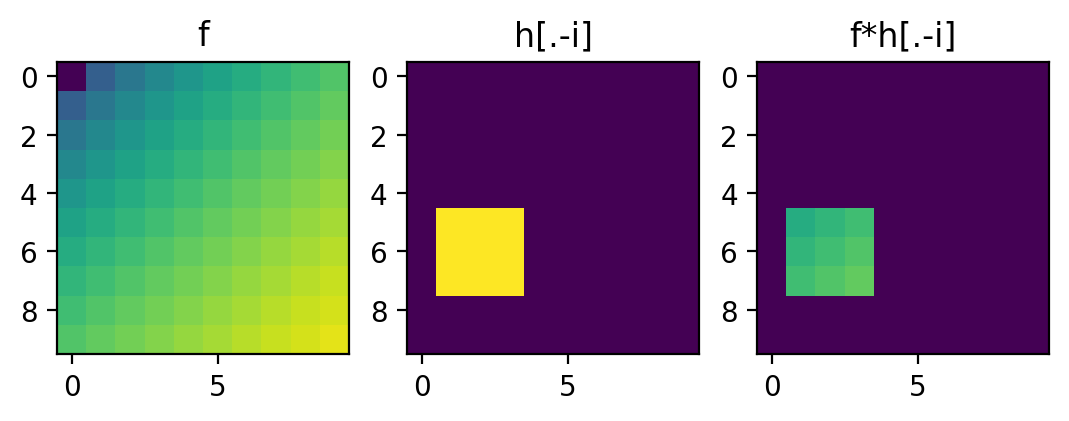

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from  scipy.ndimage import shift
mpl.rcParams['figure.dpi'] = 200


n = 10
x = ((np.arange(n)[:,None]+np.arange(n)[None,:])/20)**0.4

h = np.zeros((n,n))
h[:3,:3] = 1

i = (5,1)
h = shift(h, i)



f, axarr = plt.subplots(1,3)
axarr[0].imshow(x, vmin=0,vmax = 1)
axarr[0].set_title('f')
axarr[1].imshow(h,vmin=0,vmax = 1)
axarr[1].set_title('h[.-i]')

axarr[2].imshow(h*x,vmin=0,vmax = 1)
axarr[2].set_title('f*h[.-i]')
plt.show()


# Load some stock images

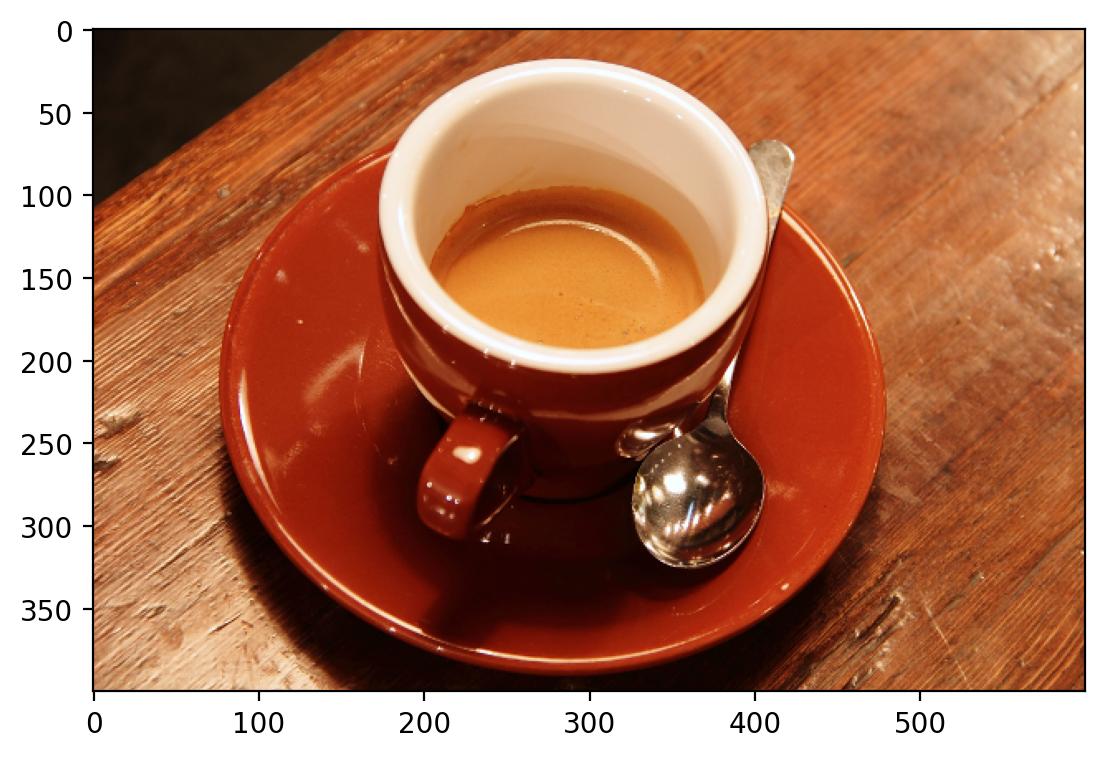

In [2]:
import numpy as np
#from scipy import signal
from scipy import datasets
                             #

import matplotlib.pyplot as plt
#from skimage.io import imshow, imread
from scipy.signal import convolve2d
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

#load image
name = 'racoon'
name = 'astronaut'
name = 'coffee'
#name = 'stairs'
#name = 'cat'

if name=='racoon':
    image = datasets.face(gray=True)
    image = np.array(image).astype('float')/255.
    plt.imshow(image, cmap='gray',vmin=0,vmax=1)

if name=='astronaut':
    from skimage.data import astronaut      # pip install scikit-image
    image = astronaut()
    image = np.array(image).astype('float')/255.
    plt.imshow(image,vmin=0,vmax=1)

if name=='cat':
    from skimage.data import cat      # pip install scikit-image
    image = cat()
    image = np.array(image).astype('float')/255.
    plt.imshow(image,vmin=0,vmax=1)

if name=='coffee':
    from skimage.data import coffee
    image = coffee()
    image = np.array(image).astype('float')/255.
    plt.imshow(image,vmin=0,vmax=1)

if name=='stairs':
    image = datasets.ascent()
    image = np.array(image).astype('float')/255.
    plt.imshow(image, cmap='gray',vmin=0,vmax=1)






# Define convolution kernel

In [7]:
#define kernel

idx = 6

if idx==0:
    k = 10
    kernel = np.ones((k,k))/k**2

if idx==1:

    kernel = np.array([[0,-1,0],
                       [-1,5,-1],
                       [ 0,-1,0]])
if idx==2:
    kernel = np.array([[0,1,0],
                       [1,-4,1],
                       [ 0,1,0]])
if idx==3:
    kernel = np.array([[1,2,1],
                       [0,0,0],
                       [ -1,-2,-1]])

if idx==4:
    kernel = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])
if idx==5:
    kernel = (1 / 16.0) * np.array([[1., 2., 1.],
                                  [2., 4., 2.],
                                  [1., 2., 1.]])
    n = 9
    x = np.arange(n)-n//2
    sigma = .10
    kernel = np.exp( - (x[:,None]**2 +  x[None,:]**2) /(2*sigma**2) )
    kernel = kernel/np.sum(kernel)

if idx==6:

    kernel = np.array([[-1,-1,-1],
                       [-1,8,-1],
                       [ -1,-1,-1]])



# Apply convolution and display

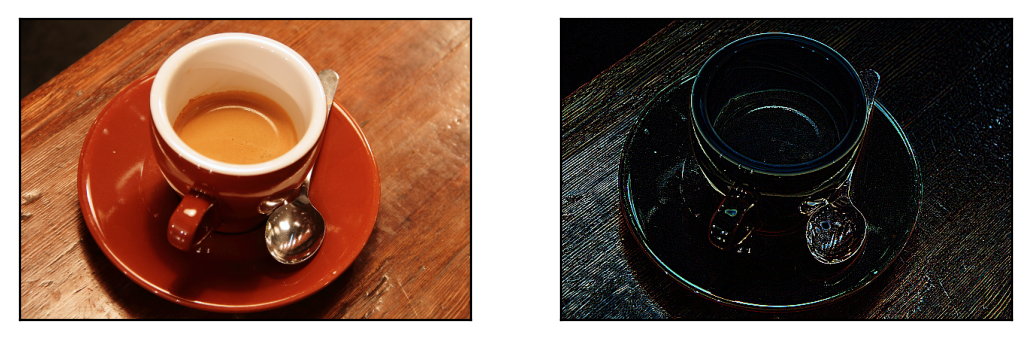

In [8]:
if len(image.shape)>2: #if colour image

    conv_image = image.copy()
    for i in range(3):
        conv_image[:,:,i] = convolve2d(image[:,:,i], kernel, boundary='symm', mode='same')

    f, axarr = plt.subplots(1,2)
    axarr[0].imshow(image,vmin=0, vmax=1)
    axarr[1].imshow(conv_image,vmin=0, vmax=1)
    axarr[0].get_xaxis().set_visible(False)
    axarr[0].get_yaxis().set_visible(False)
    axarr[1].get_xaxis().set_visible(False)
    axarr[1].get_yaxis().set_visible(False)
else: #if gray image

    conv_image = convolve2d(image, kernel, boundary='symm', mode='same')

    f, axarr = plt.subplots(1,2)
    axarr[0].imshow(image,cmap='gray',vmin=0, vmax=1)
    axarr[1].imshow(np.abs(conv_image),cmap='gray',vmin=0, vmax=1)
    axarr[0].get_xaxis().set_visible(False)
    axarr[0].get_yaxis().set_visible(False)
    axarr[1].get_xaxis().set_visible(False)
    axarr[1].get_yaxis().set_visible(False)
